# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
df_obesity = pd.read_csv("obesity_cleaned.csv")

In [3]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [4]:
df_obesity['Obesity (%)'] = (
    df_obesity['Obesity (%)']
    .str.replace(r'\[.*\]', '', regex=True)  # Remove tudo dentro de colchetes
    .str.replace('%', '')                    # Remove o símbolo %
    .replace('N/A', 'NaN')           )        # Substitui 'N/A' por 'NaN'   

In [5]:
df_obesity['Obesity (%)'] = pd.to_numeric(df_obesity['Obesity (%)'], errors='coerce') # Converte para float

In [6]:
df_obesity['Obesity'] = df_obesity['Obesity (%)']

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [7]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015]
df_obesity_2015 = df_obesity_2015.groupby('Sex')['Obesity (%)'].mean().reset_index()

In [8]:
df_obesity_2015

,Sex,Obesity (%)
0,Both sexes,19.508377
1,Female,22.899476
2,Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [ ]:
df_by_country = df_obesity.dropna(subset=['Obesity (%)']) # eliminando os NaN com .dropna
df_by_country = df_by_country.groupby('Country').apply(lambda x: (x['Obesity (%)'].iloc[-3] - x['Obesity (%)'].iloc[0])).reset_index(name='Taxa de Aumento') # o -3 é para pegar Both Sexes no último ano.

C:\Users\alant\AppData\Local\Temp\ipykernel_18316\3878199749.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_by_country = df_by_country.groupby('Country').apply(lambda x: (x['Obesity (%)'].iloc[-3] - x['Obesity (%)'].iloc[0])).reset_index(name='Taxa de Aumento')


In [26]:
df_by_country = df_by_country.sort_values(by='Taxa de Aumento', ascending=False)

In [27]:
df_by_country_top_5_head = df_by_country.head(5)
df_by_country_top_5_tail = df_by_country.tail(5)

In [28]:
df_by_country_top_5_head

,Country,Taxa de Aumento
176,Tuvalu,33.7
125,Niue,31.1
90,Kiribati,30.1
171,Tonga,28.3
39,Cook Islands,27.9


In [33]:
df_by_country_top_5_tail

,Country,Taxa de Aumento
169,Timor-Leste,3.6
13,Bangladesh,3.4
86,Japan,3.3
154,Singapore,3.1
187,Viet Nam,2.0


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [34]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015] # tive que refazer essa variavel pois dei um groupby em uma resposta la em cima

df_countries_max_min = df_obesity_2015.groupby((df_obesity_2015['Sex'])).agg(
    maior_tax = ('Obesity (%)', 'max'),
    country_max_tax = ('Country', lambda x: x[df_obesity_2015.loc[x.index, 'Obesity (%)'].idxmax()]),
    menor_tax = ('Obesity (%)', 'min'),
    country_min_tax = ('Country', lambda x: x[df_obesity_2015.loc[x.index, 'Obesity (%)'].idxmin()])
)

In [39]:
df_obesity_2015[(df_obesity_2015["Obesity (%)"] == df_obesity_2015["Obesity (%)"].max())]

,Unnamed: 0,Country,Year,Obesity (%),Sex,Obesity
15116,15116,Nauru,2015,63.1,Female,63.1


In [40]:
df_obesity_2015[df_obesity_2015["Obesity (%)"] == df_obesity_2015["Obesity (%)"].min()]

,Unnamed: 0,Country,Year,Obesity (%),Sex,Obesity
24187,24187,Viet Nam,2015,1.5,Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [41]:
df_obesity_in_brasil = df_obesity[df_obesity['Country'] == 'Brazil']
df_obesity_in_brasil_per_year = df_obesity_in_brasil.groupby(['Year', 'Sex'])['Obesity (%)'].mean().unstack().reset_index()

In [20]:
df_obesity_in_brasil_per_year

Sex,Year,Both sexes,Female,Male
0,1975,5.2,7.3,3.0
1,1976,5.5,7.6,3.2
2,1977,5.7,8.0,3.4
3,1978,6.0,8.3,3.6
4,1979,6.3,8.7,3.8
5,1980,6.6,9.0,4.1
6,1981,6.9,9.4,4.3
7,1982,7.2,9.8,4.6
8,1983,7.6,10.2,4.8
9,1984,7.9,10.6,5.1


<Axes: xlabel='Year'>

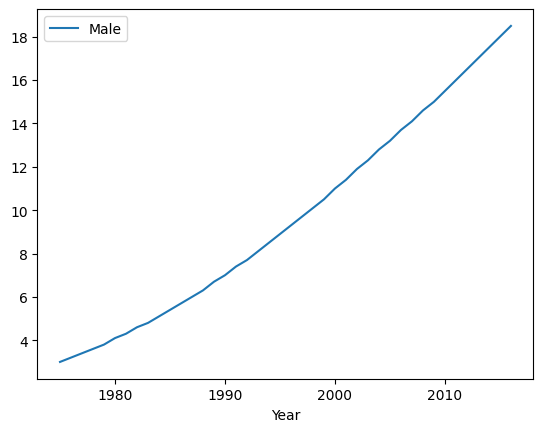

In [48]:
df_obesity_in_brasil_per_year.plot(x='Year', y='Male') # forma mais fácil de mostrar

In [21]:
df_obesity_in_brasil_per_year['Diferença entre sexos (%) (M - F)'] = round((df_obesity_in_brasil_per_year['Male'] - df_obesity_in_brasil_per_year['Female']), 2)
df_obesity_in_brasil_per_year = df_obesity_in_brasil_per_year.rename(
    columns={'Male': 'Obesity Male (%)', 'Female': 'Obesity Female (%)', 'Both sexes': 'Obesity Both (%)'}
)

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [22]:
df_obesity_in_world_per_year = df_obesity.groupby(['Year', 'Sex'])['Obesity (%)'].mean().unstack().reset_index()

In [23]:
df_obesity_in_world_per_year

Sex,Year,Both sexes,Female,Male
0,1975,6.510995,8.850262,4.076440
1,1976,6.737696,9.120419,4.251832
2,1977,6.962304,9.396859,4.427225
3,1978,7.193717,9.676963,4.612565
4,1979,7.430890,9.963351,4.805236
5,1980,7.676440,10.256021,5.002094
6,1981,7.923560,10.552356,5.205759
7,1982,8.181152,10.850262,5.421466
8,1983,8.434031,11.159162,5.637173
9,1984,8.709948,11.465445,5.858115


<Axes: xlabel='Year'>

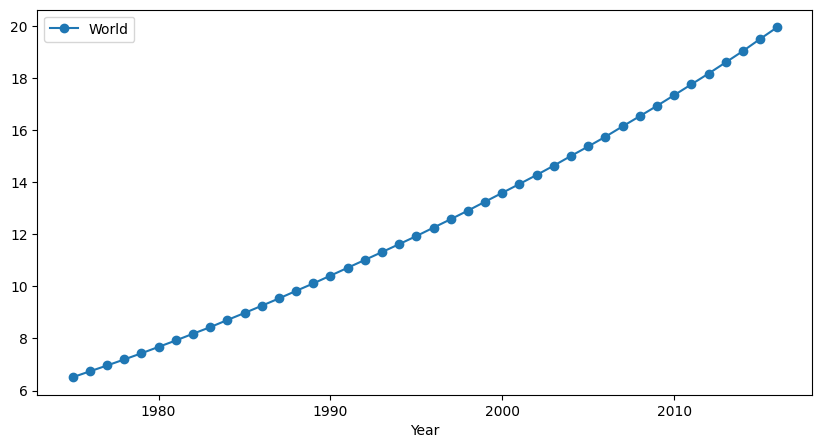

In [47]:
df_obesity_in_world_per_year.plot(x='Year', y='Both sexes', kind='line', marker='o', label='World', figsize=(10, 5))  

## Perguntas - GDP Per Person (1901-2011)

In [60]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")

In [61]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [64]:
df_gdp['Year'] = pd.to_datetime(df_gdp['Year'])
df_gdp[' GDP_pp '] = df_gdp[' GDP_pp '].str.replace(',', '').astype(float)

- Você conseguiria informar o primeiro valor registrado de cada país?

In [62]:
df_gdp_country_first_app = df_gdp.drop_duplicates(subset='Country', keep='first').reset_index(drop=True)

In [56]:
df_gdp_country_first_app

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901-01-01,613.99
1,Albania,Europe,1901-01-01,1062.01
2,Algeria,"Middle East, North Africa, and Greater Arabia",1901-01-01,1807.76
3,Andorra,Europe,1901-01-01,3352.50
4,Angola,Sub-Saharan Africa,1901-01-01,525.76
...,...,...,...,...
188,Venezuela,South America,1901-01-01,766.21
189,Vietnam,Asia,1901-01-01,572.96
190,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1901-01-01,729.39
191,Zambia,Sub-Saharan Africa,1901-01-01,532.38


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [65]:
df_gdp_until_2000 = df_gdp[df_gdp['Year'].dt.year <= 2000]

In [98]:
df_gdp_until_2000

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901-01-01,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906-01-01,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911-01-01,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916-01-01,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921-01-01,662.40
...,...,...,...,...
4411,Zimbabwe,Sub-Saharan Africa,1976-01-01,762.17
4412,Zimbabwe,Sub-Saharan Africa,1981-01-01,790.30
4413,Zimbabwe,Sub-Saharan Africa,1986-01-01,742.30
4414,Zimbabwe,Sub-Saharan Africa,1991-01-01,782.09


In [74]:
df_gdp_grow_to_2000 = df_gdp.groupby('Region').apply(lambda x: ((x[x['Year'].dt.year == 1996][' GDP_pp '].mean() - x[x['Year'].dt.year == 1901][' GDP_pp '].mean()) / x[x['Year'].dt.year == 1901][' GDP_pp '].mean())* 100).reset_index(name='Crescimento até 2000')

C:\Users\alant\AppData\Local\Temp\ipykernel_18316\939622757.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gdp_grow_to_2000 = df_gdp.groupby('Region').apply(lambda x: ((x[x['Year'].dt.year == 1996][' GDP_pp '].mean() - x[x['Year'].dt.year == 1901][' GDP_pp '].mean()) / x[x['Year'].dt.year == 1901][' GDP_pp '].mean())* 100).reset_index(name='Crescimento até 2000')


In [75]:
df_gdp_grow_to_2000

,Region,Crescimento até 2000
0,Asia,711.761516
1,Australia and Oceania,396.075383
2,Central America and the Caribbean,406.426789
3,Europe,594.046167
4,"Middle East, North Africa, and Greater Arabia",857.215950
5,North America,589.760175
6,South America,312.123735
7,Sub-Saharan Africa,248.633780


- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [78]:
ano_min = 1901
ano_max = df_gdp['Year'].dt.year.max()

In [79]:
all_years = np.arange(ano_min, ano_max + 1)

In [80]:
countries = df_gdp['Country'].unique()

In [81]:
df_countries_x_years = pd.DataFrame([(country, year) for country in countries for year in all_years], columns=['Country', 'Year'])

In [82]:
df_countries_x_years['Year'] = pd.to_datetime(df_countries_x_years['Year'], format='%Y')

In [83]:
df_countries_x_years = df_countries_x_years.merge(df_gdp, on=['Country', 'Year'], how='left')

In [84]:
df_countries_x_years = df_countries_x_years.sort_values(by=['Country', 'Year']).reset_index(drop=True)

In [85]:
df_countries_x_years

,Country,Year,Region,GDP_pp
0,Afghanistan,1901-01-01,"Middle East, North Africa, and Greater Arabia",613.99
1,Afghanistan,1902-01-01,NaN,NaN
2,Afghanistan,1903-01-01,NaN,NaN
3,Afghanistan,1904-01-01,NaN,NaN
4,Afghanistan,1905-01-01,NaN,NaN
...,...,...,...,...
21418,Zimbabwe,2007-01-01,NaN,NaN
21419,Zimbabwe,2008-01-01,NaN,NaN
21420,Zimbabwe,2009-01-01,NaN,NaN
21421,Zimbabwe,2010-01-01,NaN,NaN


In [86]:
df_countries_x_years[' GDP_pp '] = df_countries_x_years.groupby('Country')[' GDP_pp '].transform(lambda x: x.interpolate(method='linear'))

In [87]:
df_countries_x_years[' GDP_pp '] = round(df_countries_x_years[' GDP_pp '] , 2)

In [88]:
df_countries_x_years

,Country,Year,Region,GDP_pp
0,Afghanistan,1901-01-01,"Middle East, North Africa, and Greater Arabia",613.99
1,Afghanistan,1902-01-01,NaN,616.00
2,Afghanistan,1903-01-01,NaN,618.01
3,Afghanistan,1904-01-01,NaN,620.02
4,Afghanistan,1905-01-01,NaN,622.03
...,...,...,...,...
21418,Zimbabwe,2007-01-01,NaN,521.40
21419,Zimbabwe,2008-01-01,NaN,522.63
21420,Zimbabwe,2009-01-01,NaN,523.87
21421,Zimbabwe,2010-01-01,NaN,525.10
